In [1]:
# Preamble
from astropy.table import Table, column
import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

import sys
sys.path.append('../astro_codes/')

In [2]:
pitch_angles = Table.read('../fits/sparcfire/pitch_angles_g.fits')
mendel_masses = Table.read('../fits/Simard+Mendel/mendel_masses.fits')
nsa_data = Table.read('../fits/SF_fits/nsa_less.fits')
g_ok = Table.read('g_vs_r/g_ok.fits')
sparcfire_samples = Table.read('../fits/sparcfire/sparcfire_samples.fits')
subset_ids = Table.read('panoptes_project/panoptes_images/spiral_table.fits')

In [3]:
gz2_data = Table.read('../fits/full_sample_debiased_w_low_z.fits')

In [4]:
sparcfire_g = Table.read('../sparcfire_directories/g/g.galaxy_matched.fits')

In [5]:
# Look for spirals (Hart+17 method), which have been successfully reduced in sparcfire
spiral_sample = np.all([sparcfire_samples['in_sparcfire'],sparcfire_samples['axial_ok'],
                        sparcfire_samples['in_mass_limit'],sparcfire_samples['in_spiral'],
                        g_ok['ok']],axis=0)

print('{} spiral galaxies in total!'.format(spiral_sample.sum()))

2671 spiral galaxies in total!


In [6]:
g_i = nsa_data['M_corrected'][:,3] - nsa_data['M_corrected'][:,5]
N = sparcfire_g['totalNumArcs']
N_53 = pitch_angles['N']

In [7]:
from combining_catalogues import match_ids
from contours import kde_contour

matched_ids = match_ids(gz2_data,subset_ids,'dr8objid','dr8id')
in_subset_all = np.full(len(gz2_data),False,dtype='bool')
in_subset_all[matched_ids['reference_index']] = True

248883 galaxies in the reference catalogue
500 galaxies in the match catalogue
---> 500 matches in total


In [8]:
ids = gz2_data['dr8objid'][spiral_sample]
M_u = gz2_data['PETROMAG_MU'][spiral_sample]
M_g = gz2_data['PETROMAG_MG'][spiral_sample]
M_r = gz2_data['PETROMAG_MR'][spiral_sample]
M_i = gz2_data['PETROMAG_MI'][spiral_sample]
M_z = gz2_data['PETROMAG_MZ'][spiral_sample]
in_subset = in_subset_all[spiral_sample]
m_gz2 = pitch_angles['m'][spiral_sample]
m_wtd_avg_gz2 = pitch_angles['m_wtd_avg'][spiral_sample]
w_gz2 = pitch_angles['w'][spiral_sample]
w_wtd_avg_gz2 = pitch_angles['w_wtd_avg'][spiral_sample]
p_bar = gz2_data['t03_bar_a06_bar_debiased_rh'][spiral_sample]
N_sparcfire = N[spiral_sample]
N_sparcfire_less = N_53[spiral_sample]
mendel_mass = mendel_masses['bulge+disc'][spiral_sample]

parameter_table = Table(np.array([ids,in_subset,M_u,M_g,M_r,M_i,M_z,m_gz2,m_wtd_avg_gz2,w_gz2,
                         w_wtd_avg_gz2,p_bar,N_sparcfire,N_sparcfire_less,mendel_mass]).T,
                        names=('id','in_subset','M_u','M_g','M_r','M_i','M_z','m_gz2','m_wtd_avg_gz2','w_gz2',
                               'w_wtd_avg_gz2','p_bar','N_sparcfire','N_sparcfire_less','mendel_mass'))

#### Colour-magnitude diagram: GZ2

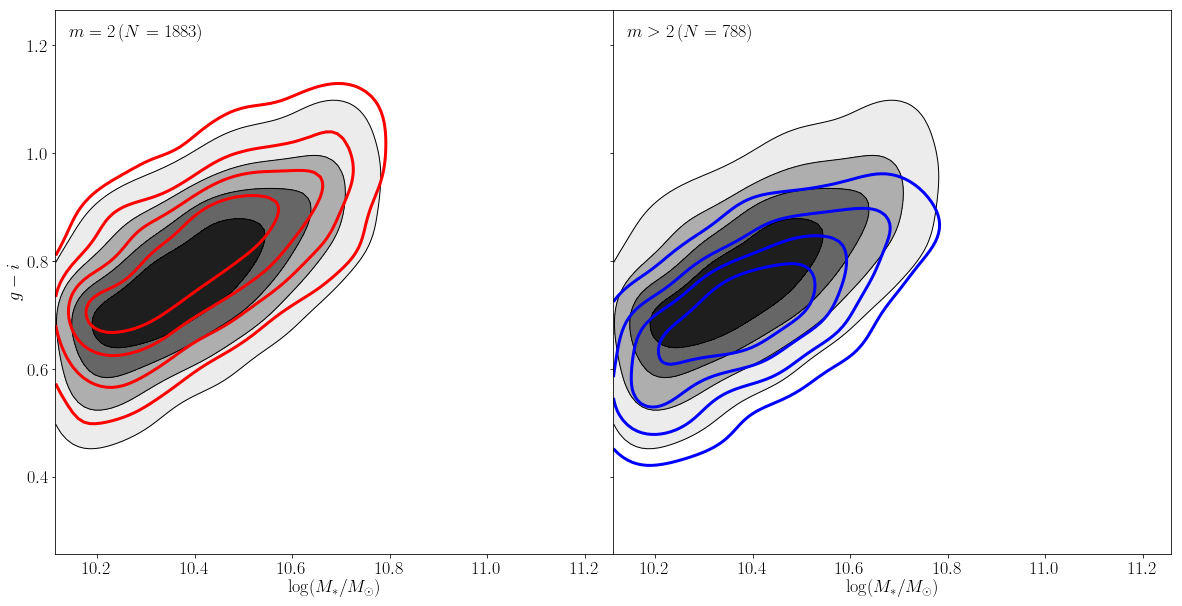

In [9]:
x = parameter_table['mendel_mass']
y = parameter_table['M_g']-parameter_table['M_i']

fig, axarr = plt.subplots(1,2,figsize=(20,10),
                          sharex=True,sharey=True)
axarr = axarr.ravel()
fig.subplots_adjust(hspace=0,wspace=0)

N_var = parameter_table['m_gz2']
masks = [N_var <= 2,N_var > 2]
colors = 'rb'
mlabels = 'm=2','m>2'

for m in range(2):
    mask = masks[m]
    plt.sca(axarr[m])
    _ = kde_contour(x,y,fill=True)
    x_m, y_m = x[mask], y[mask]
    line_properties = {'linewidth':3,
                       'color':colors[m]}
    _ = kde_contour(x_m,y_m,fill=False,line_properties=line_properties)
    axarr[m].set_xlabel('$\log(M_*/M_{\odot})$')
    text_string = '${} \, (N={})$'.format(mlabels[m],len(x_m))
    axarr[m].text(0.025,0.975,text_string,
                  ha='left',va='top',transform=axarr[m].transAxes)

axarr[0].set_ylabel('$g-i$')

fig.savefig('colour_mass_gz2.pdf')

#### Colour-magnitude diagram: sparcfire (raw)

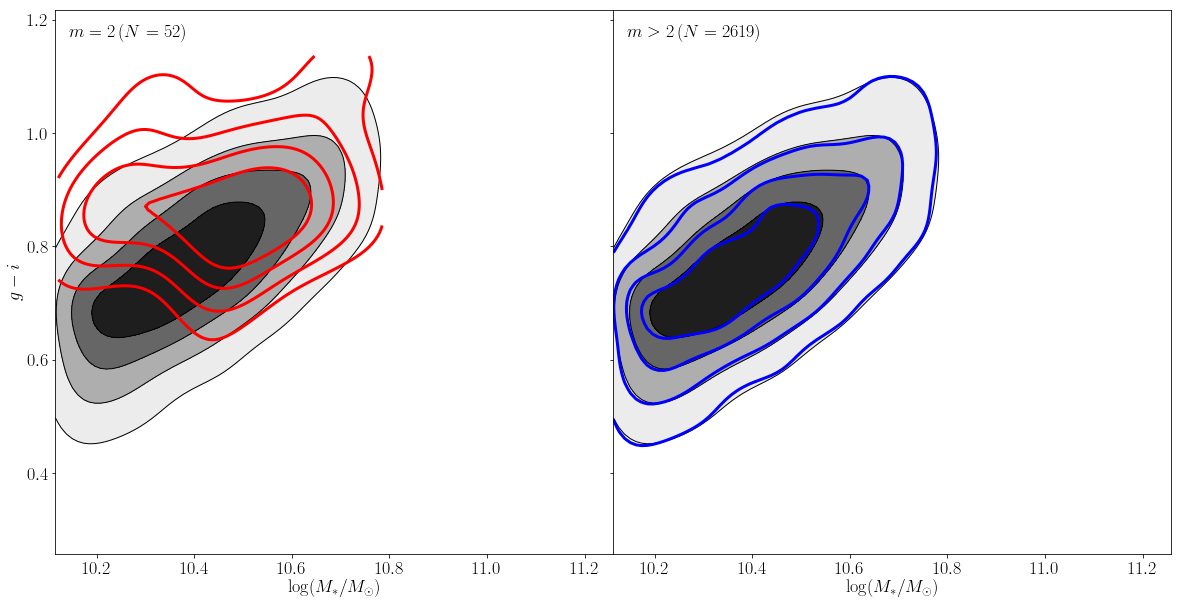

In [10]:
in_subset = parameter_table['in_subset'].astype('bool')

x = parameter_table['mendel_mass']
y = parameter_table['M_g']-parameter_table['M_i']

fig, axarr = plt.subplots(1,2,figsize=(20,10),
                          sharex=True,sharey=True)
axarr = axarr.ravel()
fig.subplots_adjust(hspace=0,wspace=0)

N_var = parameter_table['N_sparcfire']
masks = [N_var <= 2,N_var > 2]
colors = 'rb'
mlabels = 'm=2','m>2'

for m in range(2):
    mask = masks[m]
    plt.sca(axarr[m])
    _ = kde_contour(x,y,fill=True)
    x_m, y_m = x[mask], y[mask]
    line_properties = {'linewidth':3,
                       'color':colors[m]}
    _ = kde_contour(x_m,y_m,fill=False,line_properties=line_properties)
    axarr[m].set_xlabel('$\log(M_*/M_{\odot})$')
    text_string = '${} \, (N={})$'.format(mlabels[m],len(x_m))
    axarr[m].text(0.025,0.975,text_string,
                  ha='left',va='top',transform=axarr[m].transAxes)

axarr[0].set_ylabel('$g-i$')

fig.savefig('colour_mass_uncleaned.pdf')

#### Colour-magnitude diagram: sparcfire (less)

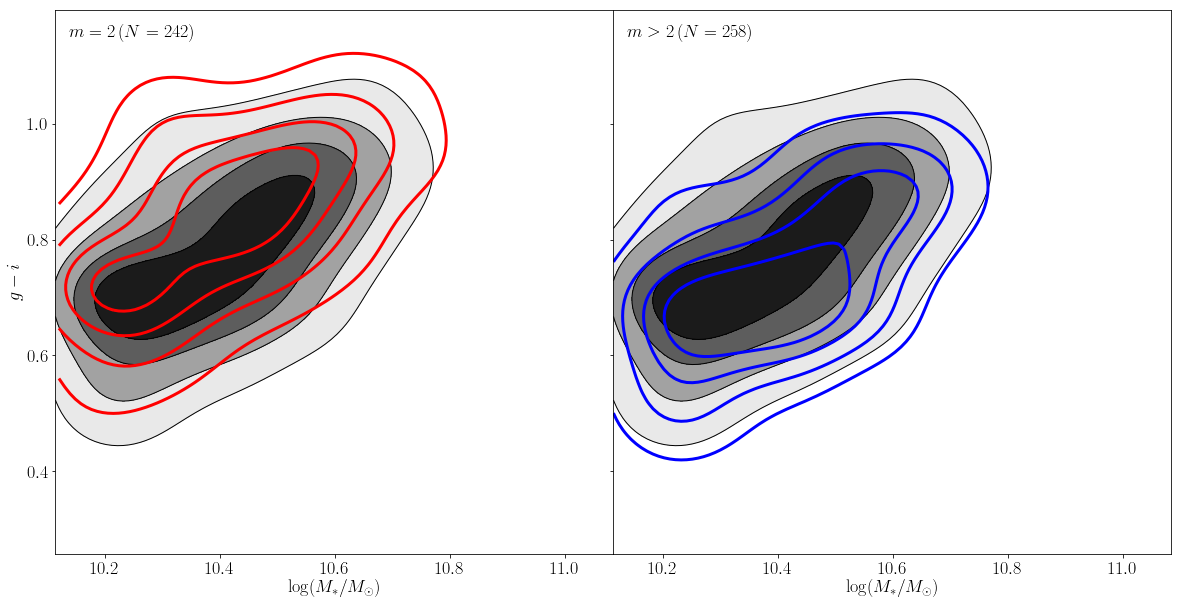

In [11]:
in_subset = parameter_table['in_subset'].astype('bool')

x = parameter_table['mendel_mass'][in_subset]
y = (parameter_table['M_g']-parameter_table['M_i'])[in_subset]

fig, axarr = plt.subplots(1,2,figsize=(20,10),
                          sharex=True,sharey=True)
axarr = axarr.ravel()
fig.subplots_adjust(hspace=0,wspace=0)

N_var = parameter_table['N_sparcfire_less'][in_subset]
masks = [N_var <= 2,N_var > 2]
colors = 'rb'
mlabels = 'm=2','m>2'

for m in range(2):
    mask = masks[m]
    plt.sca(axarr[m])
    _ = kde_contour(x,y,fill=True)
    x_m, y_m = x[mask], y[mask]
    line_properties = {'linewidth':3,
                       'color':colors[m]}
    _ = kde_contour(x_m,y_m,fill=False,line_properties=line_properties)
    axarr[m].set_xlabel('$\log(M_*/M_{\odot})$')
    text_string = '${} \, (N={})$'.format(mlabels[m],len(x_m))
    axarr[m].text(0.025,0.975,text_string,
                  ha='left',va='top',transform=axarr[m].transAxes)

axarr[0].set_ylabel('$g-i$')

fig.savefig('colour_mass_cleaned.pdf')

In [ ]:
in_subset.sum()